In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# OS 확인
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # Mac
    font_name = 'AppleGothic'
else:
    font_name = 'NanumGothic'  # Linux 환경이면 설치 필요

plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지


In [8]:
# 1. 기존 merged.csv 불러오기
merged = pd.read_csv("최종병합데이터.csv")

# 2. 경제활동참가율 데이터 불러오기 및 연도 기준 집계
econ = pd.read_csv("경제활동인구/경제활동인구비율.csv")
econ["연도"] = pd.to_datetime(econ["월기준"]).dt.year
econ = econ.groupby(["시도", "연도"], as_index=False)["경제활동참가율"].mean()

# 3. 병합
merged_with_econ = pd.merge(merged, econ, on=["시도", "연도"], how="left")


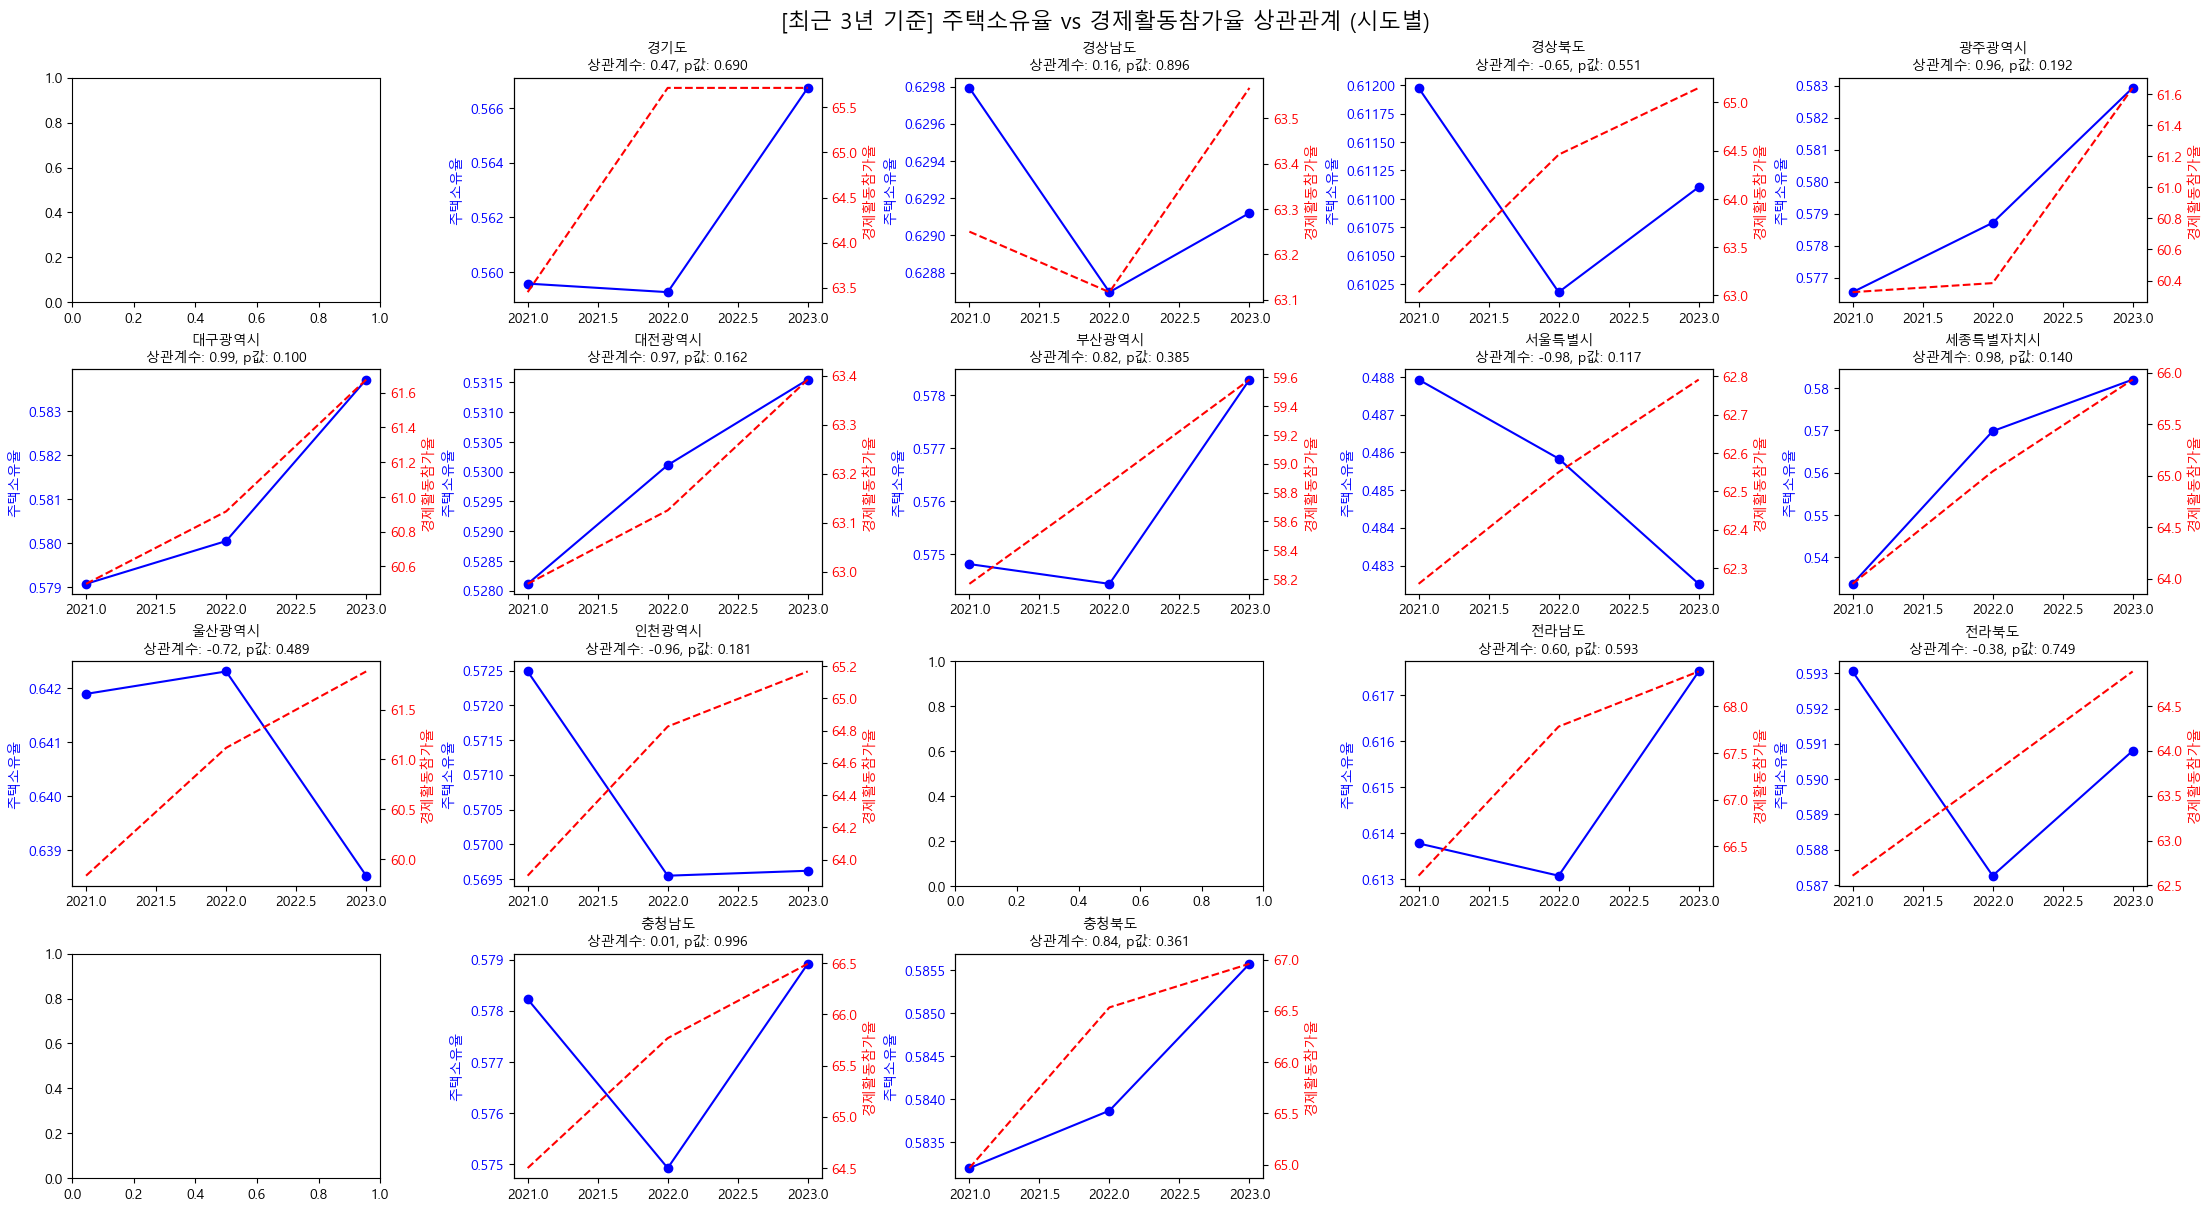

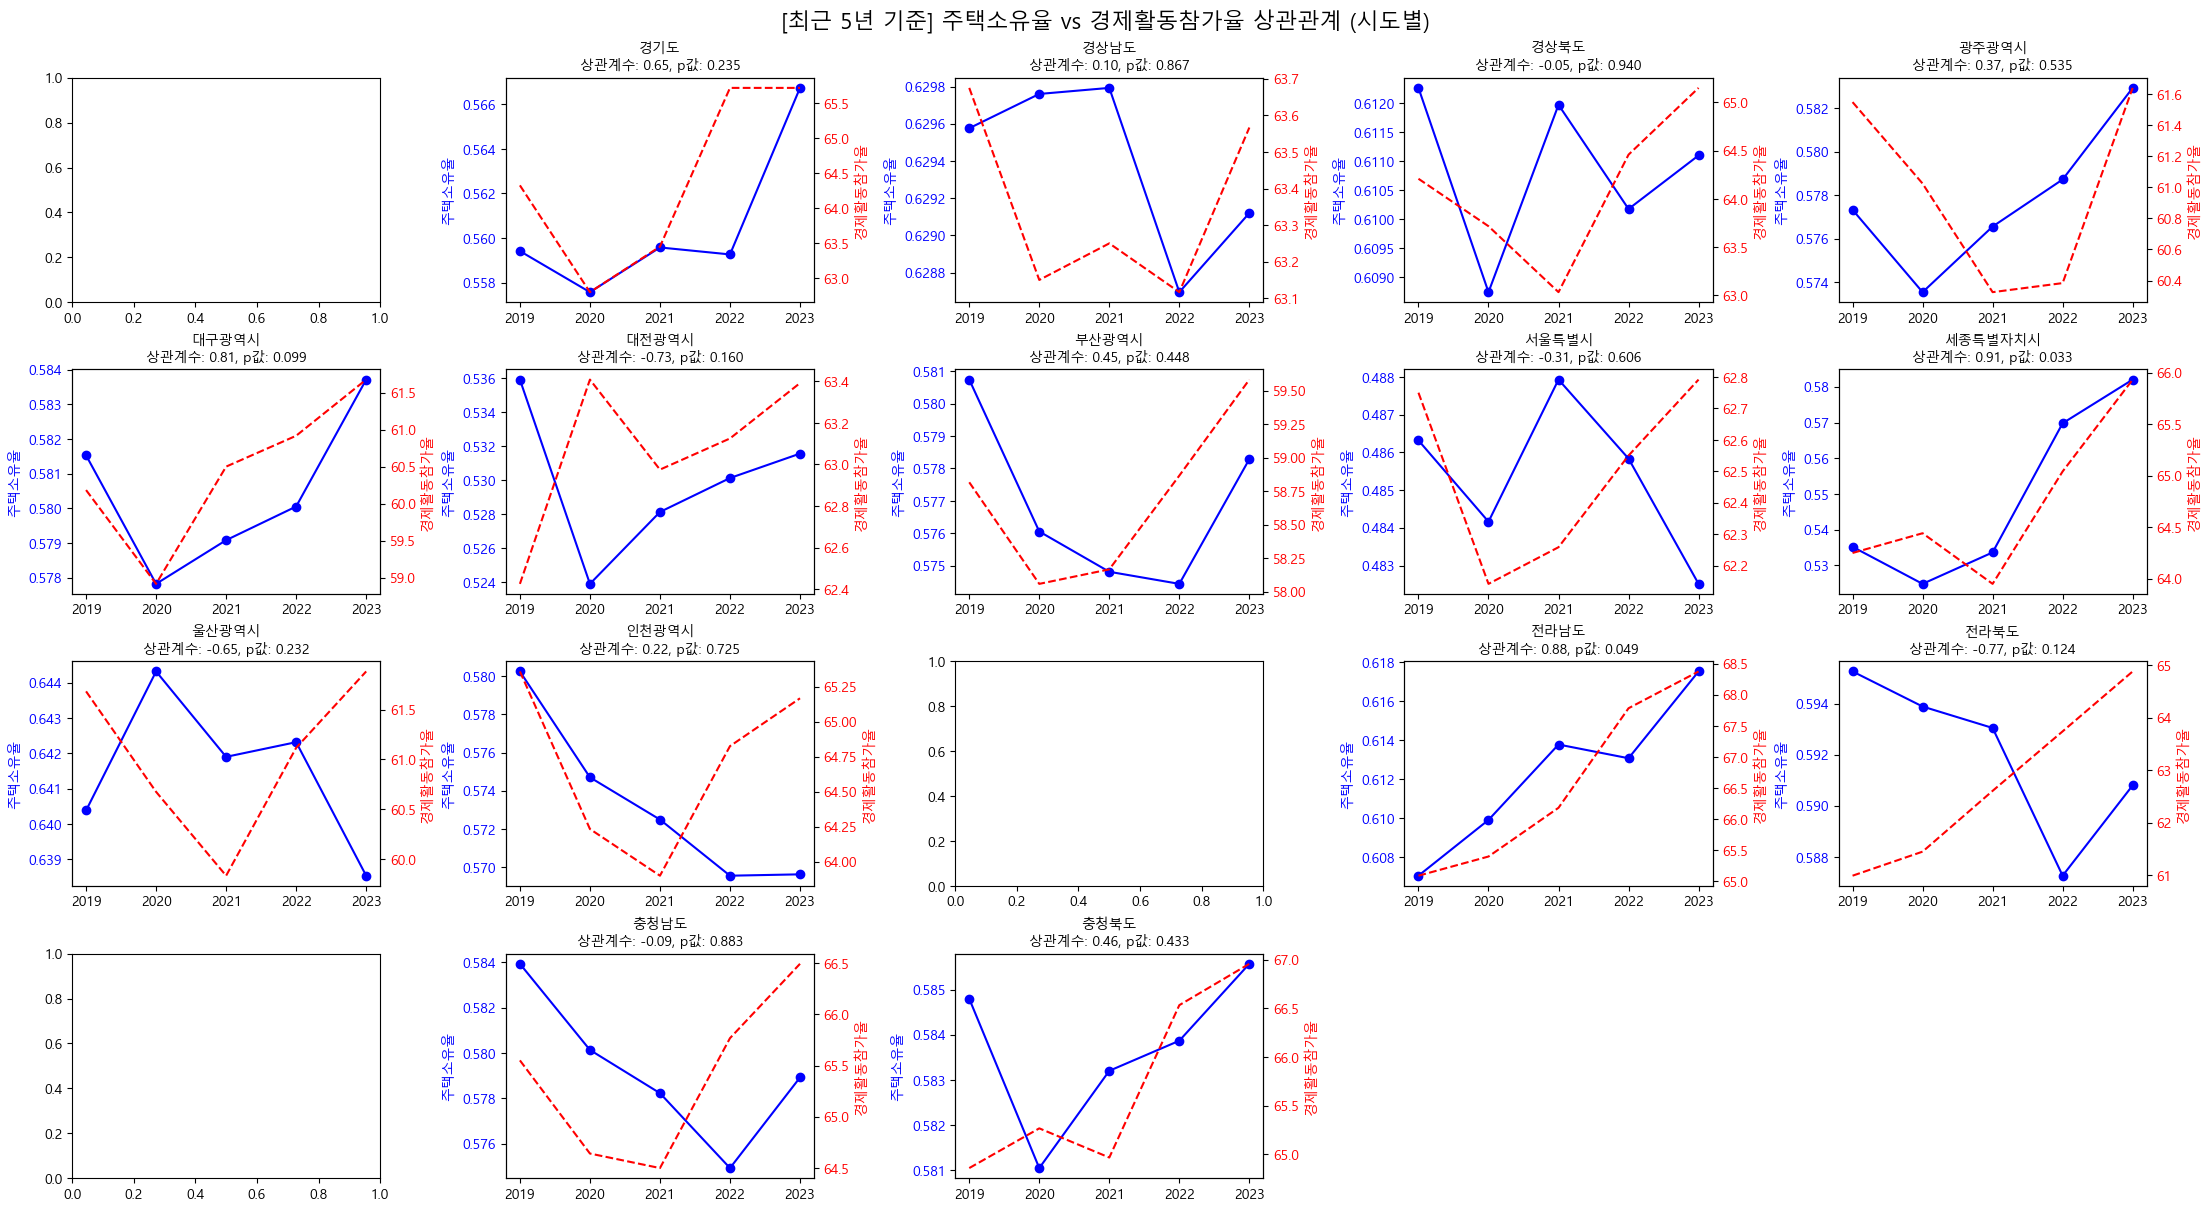

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def filter_recent_years(df, years=3):
    max_year = df["연도"].max()
    return df[df["연도"] >= (max_year - years + 1)]

def plot_correlation_by_region(df, value_col, ylabel, title_prefix):
    regions = df["시도"].unique()
    n_cols = 5
    n_rows = (len(regions) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 3), constrained_layout=True)
    axes = axes.flatten()

    for idx, region in enumerate(regions):
        region_df = df[df["시도"] == region].sort_values("연도")
        region_df = region_df.dropna(subset=["주택소유율", value_col])

        if len(region_df) < 2:
            continue

        x = region_df["연도"]
        y1 = region_df["주택소유율"]
        y2 = region_df[value_col]

        corr, pval = pearsonr(y1, y2)

        ax = axes[idx]
        ax.plot(x, y1, 'bo-', label='주택소유율')
        ax2 = ax.twinx()
        ax2.plot(x, y2, 'r--', label=ylabel)

        ax.set_ylabel("주택소유율", color='blue')
        ax2.set_ylabel(ylabel, color='red')
        ax.tick_params(axis='y', labelcolor='blue')
        ax2.tick_params(axis='y', labelcolor='red')

        ax.set_title(f"{region}\n상관계수: {corr:.2f}, p값: {pval:.3f}", fontsize=10)

    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"{title_prefix} 주택소유율 vs {ylabel} 상관관계 (시도별)", fontsize=16)
    plt.show()

# 사용 예시:
# merged_with_econ: 병합된 데이터프레임
# '경제활동참가율'이 포함되어 있어야 함

# 최근 3년 기준
plot_correlation_by_region(
    filter_recent_years(merged_with_econ, years=3),
    value_col="경제활동참가율",
    ylabel="경제활동참가율",
    title_prefix="[최근 3년 기준]"
)

# 최근 5년 기준
plot_correlation_by_region(
    filter_recent_years(merged_with_econ, years=5),
    value_col="경제활동참가율",
    ylabel="경제활동참가율",
    title_prefix="[최근 5년 기준]"
)
